In [1]:
#Various models required
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [2]:
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category
X  =[] 
Y = []
for category in os.listdir("F:\\MACOSX\\20_newsgroups\\"):
    for document in os.listdir("F:\\MACOSX\\20_newsgroups\\"+category):
        with open("F:\\MACOSX\\20_newsgroups\\"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'F:\\MACOSX\\20_newsgroups\\'

In [32]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can see it is a tuple with first element as name of document and second text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [33]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [34]:
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))

14997
5000


In [51]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'newsgroups': 15296,
 'misc': 8890,
 'forsale': 2068,
 'path': 15291,
 'cantaloupe': 19555,
 'srv': 24283,
 'cmu': 39169,
 'edu': 122893,
 'das': 4554,
 'news': 25625,
 'harvard': 5186,
 'noc': 4605,
 'near': 5148,
 'net': 19057,
 'uunet': 4031,
 'ocsmd': 19,
 'mark': 1426,
 'ocs': 106,
 'com': 37487,
 'wilson': 196,
 'subject': 16122,
 'update': 210,
 'hard': 1544,
 'drive': 1989,
 'vga': 339,
 'etc': 2234,
 'message': 16477,
 'sender': 8230,
 'organization': 14909,
 'online': 410,
 'computer': 2857,
 'systems': 1614,
 'inc': 1579,
 'newsreader': 849,
 'tin': 730,
 'date': 15609,
 'fri': 1773,
 'apr': 15373,
 'gmt': 13318,
 'lines': 15687,
 'article': 10105,
 'crossposted': 26,
 'computers': 782,
 'clone': 269,
 'author': 475,
 'posted': 627,
 'sale': 988,
 'items': 188,
 'plus': 615,
 'shipping': 367,
 'core': 193,
 'model': 610,
 'works': 976,
 'fine': 737,
 'full': 1070,
 'height': 135,
 'reduced': 149,
 'mfm': 68,
 'controller': 521,
 'like': 7741,
 'sell': 608,
 'asking': 526,
 

In [52]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 122893),
 ('cmu', 39169),
 ('com', 37487),
 ('news', 25625),
 ('not', 24905),
 ('srv', 24283),
 ('cantaloupe', 19555),
 ('net', 19057),
 ('message', 16477),
 ('subject', 16122),
 ('lines', 15687),
 ('date', 15609),
 ('apr', 15373),
 ('newsgroups', 15296),
 ('path', 15291),
 ('can', 15031),
 ('organization', 14909),
 ('state', 14126),
 ('gmt', 13318),
 ('one', 11911),
 ('ohio', 11861),
 ('will', 11507),
 ('writes', 11000),
 ('article', 10105),
 ('comp', 9922),
 ('references', 9744),
 ('talk', 9223),
 ('misc', 8890),
 ('ans', 8297),
 ('sender', 8230),
 ('howland', 8224),
 ('reston', 8185),
 ('don', 7846),
 ('people', 7794),
 ('like', 7741),
 ('university', 7555),
 ('just', 7475),
 ('posting', 7248),
 ('nntp', 6996),
 ('know', 6917),
 ('mps', 6881),
 ('host', 6677),
 ('sci', 6643),
 ('get', 6497),
 ('usenet', 6199),
 ('zaphod', 6194),
 ('think', 6189),
 ('may', 6053),
 ('politics', 5962),
 ('alt', 5936),
 ('also', 5769),
 ('windows', 5643),
 ('time', 5308),
 ('use', 5229),
 ('har

In [53]:
import matplotlib.pyplot as plt

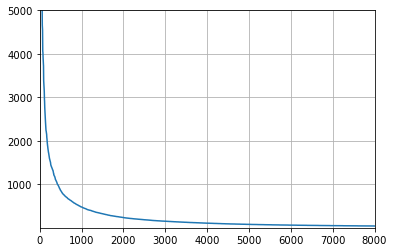

In [54]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [55]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'one',
 'ohio',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'people',
 'like',
 'university',
 'just',
 'posting',
 'nntp',
 'know',
 'mps',
 'host',
 'sci',
 'get',
 'usenet',
 'zaphod',
 'think',
 'may',
 'politics',
 'alt',
 'also',
 'windows',
 'time',
 'use',
 'harvard',
 'rutgers',
 'eng',
 'near',
 'new',
 'rec',
 'soc',
 'good',
 'crabapple',
 'well',
 'sei',
 'noc',
 'system',
 'xref',
 'das',
 'now',
 'even',
 'cis',
 'see',
 'europa',
 'gtefsd',
 'world',
 'ece',
 'uunet',
 'org',
 'way',
 'make',
 'god',
 'two',
 'religion',
 'much',
 'say',
 'gov',
 'many',
 'first',
 'right',
 'christian',
 'rochester',
 'distribution',
 'club',
 'mail',
 'space',
 'gatech',
 'anyone',
 'want',
 'said',
 'andrew',
 'cultu

In [70]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [57]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1


In [58]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[ 2  1  6 ...  0  0  0]
 [ 6  3  4 ...  0  0  0]
 [15  1  0 ...  0  0  0]
 ...
 [ 7  2  1 ...  0  0  0]
 [11  4  1 ...  0  0  0]
 [ 6  2  1 ...  1  0  0]]
--------------------------
[[ 7  3  8 ...  0  0  0]
 [14  2  0 ...  0  0  0]
 [ 9  2  1 ...  0  0  0]
 ...
 [ 6  1  0 ...  0  0  0]
 [ 7  4  4 ...  0  0  0]
 [ 9  1  0 ...  0  0  0]]


In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [60]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on training data: 0.893712075748483
Score on testing data: 0.8538
[[213   0   0   0   0   0   1   3   2   0   0   0   3   0   0   5   0   1
    0  43]
 [  0 187  14   7   9   3  10   1   1   0   0   0   3   3   2   0   0   0
    0   0]
 [  0   0 219  13   6  14   8   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   4   6 192  30   0   4   1   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   5   3  19 219   0   5   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0  11  27   8   3 177   3   0   0   0   0   1   3   1   0   0   0   0
    0   0]
 [  0   1   0   4   2   0 249   5   1   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   1   8 202   9   0   2   0   5   0   0   0   1   0
    0   0]
 [  0   1   0   0   0   0   2   8 234   0   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   3   4 258  13   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   1   0   2   2   9 240   0   0   0   0   0   0   0
    

<font color='black'>Self Implementation of Naive Baye</font>

In [61]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

In [62]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [63]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [64]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [65]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [66]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)

In [67]:
dictionary

{'total_doc': 14997,
 'rec.sport.baseball': {'edu': 6286,
  'cmu': 1301,
  'com': 1575,
  'news': 1469,
  'not': 847,
  'srv': 857,
  'cantaloupe': 733,
  'net': 994,
  'message': 740,
  'subject': 747,
  'lines': 737,
  'date': 736,
  'apr': 788,
  'newsgroups': 724,
  'path': 725,
  'can': 503,
  'organization': 734,
  'state': 487,
  'gmt': 661,
  'one': 445,
  'ohio': 438,
  'will': 405,
  'writes': 605,
  'article': 556,
  'comp': 26,
  'references': 541,
  'talk': 46,
  'misc': 1,
  'ans': 427,
  'sender': 422,
  'howland': 415,
  'reston': 415,
  'don': 431,
  'people': 149,
  'like': 307,
  'university': 357,
  'just': 313,
  'posting': 326,
  'nntp': 338,
  'know': 276,
  'mps': 291,
  'host': 305,
  'sci': 26,
  'get': 289,
  'usenet': 335,
  'zaphod': 253,
  'think': 360,
  'may': 148,
  'politics': 3,
  'alt': 4,
  'also': 190,
  'windows': 0,
  'time': 317,
  'use': 49,
  'harvard': 301,
  'rutgers': 27,
  'eng': 146,
  'near': 265,
  'new': 189,
  'rec': 791,
  'soc': 11,

In [68]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [69]:
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on testing_data: 0.8732
[[229   2   0   0   0   0   1   2   2   0   0   0   3   0   0   2   0   0
    0  30]
 [  0 194   8  12   6   5   6   1   0   0   0   0   4   4   0   0   0   0
    0   0]
 [  0   8 217  17   2  12   3   0   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   3   4 200  25   0   5   0   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   5   2  20 224   0   2   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  16  12   6   4 189   3   0   1   0   0   0   1   2   0   0   0   0
    0   0]
 [  0   0   0   5   1   0 252   3   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   8 208   4   0   0   0   7   0   0   0   1   0
    0   0]
 [  0   1   0   0   0   0   2   5 238   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   2 270   6   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   1   2   7 243   0   0   0   0   0   0   0
    0   0]
 [  0   2   0   0   0   1   0   0  

RESULT:

We have performed text-classification both by sklearn and self implementation.

We found out that sklearn gave score of  0.8538 on testing_data,whereas self implemented classifier gave 0.8732 on testing data,which is very close.